In [187]:
import numpy as np
import pandas as pd
import requests
from bs4 import BeautifulSoup
import re
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt

# WebScrapping

In [190]:
url = "https://housing.com/in/buy/searches/BO0Psrbcrw7p4zhuczr"

In [192]:
response = requests.get(url)

'<!doctype html><html lang="en" prefix="og: http://ogp.me/ns# website: http://ogp.me/ns/website#"><head><link rel="preconnect" href="//c.housingcdn.com"/><link rel="preconnect" href="//is1-3.housingcdn.com"/><link rel="preconnect" href="//eventrouter.housing.com"/><link rel="preconnect" href="//img.youtube.com"/><link rel="preconnect" href="//is1-2.housingcdn.com"/><meta http-equiv="origin-trial" content="AsgGWjPX2xx12aBpNxa8enFVy/0d/Ghc/GLjQO1gdmgn6eayydZJK0TGTifjIngm+7B4rWjfgVoyHZFbeKq0pg4AAABgeyJvcmlnaW4iOiJodHRwczovL2hvdXNpbmcuY29tOjQ0MyIsImZlYXR1cmUiOiJXYWtlTG9jayIsImV4cGlyeSI6MTU5MTA5NTk2MSwiaXNTdWJkb21haW4iOnRydWV9"/><meta name="referrer" content="no-referrer-when-downgrade"/><link rel="prefetch" href="//c.housingcdn.com/demand/s/client/common/assets/loader.fd27d2ce.svg" as="image"/><link rel="preload" href="https://housing-images.n7net.in/4f2250e8/310c84db363a18165dd4f8288fc45428/v0/medium/asbl_landmark-kukatpally-hyderabad-ashoka_builders_india_private_limited.jpeg" as="image"
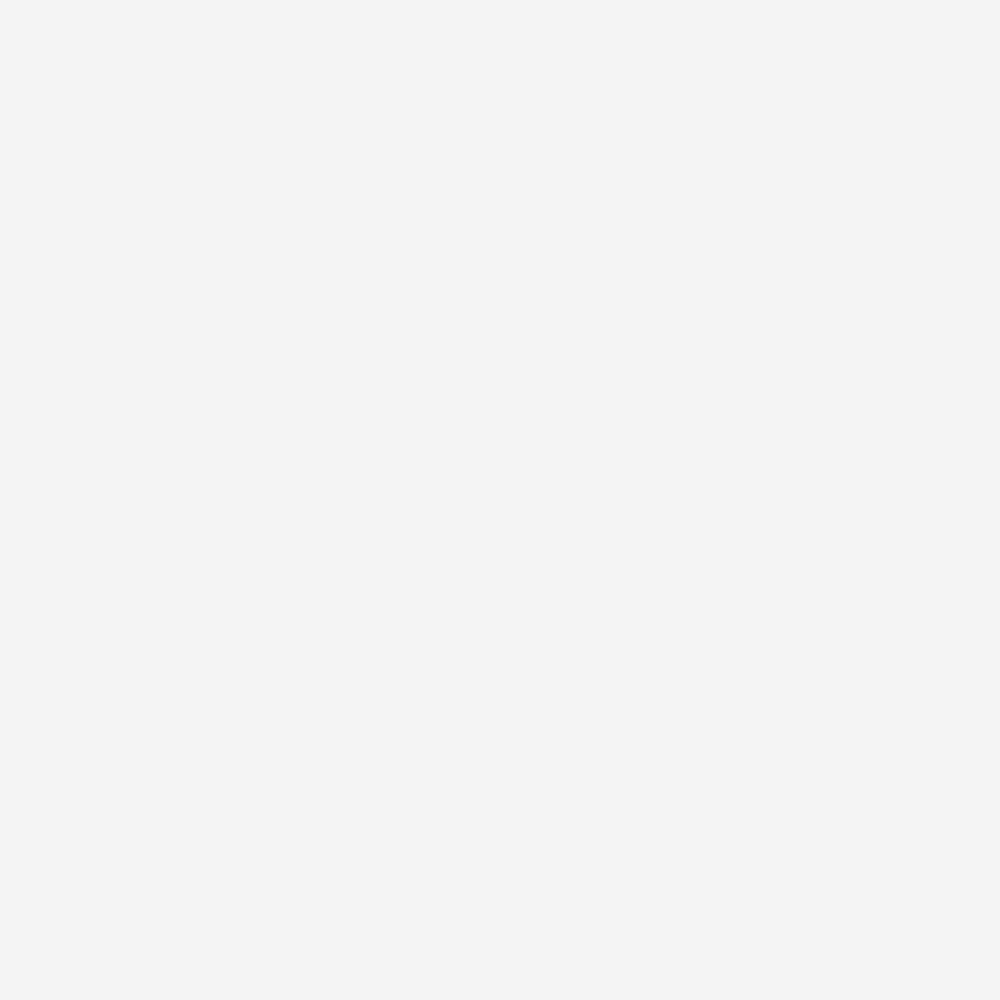
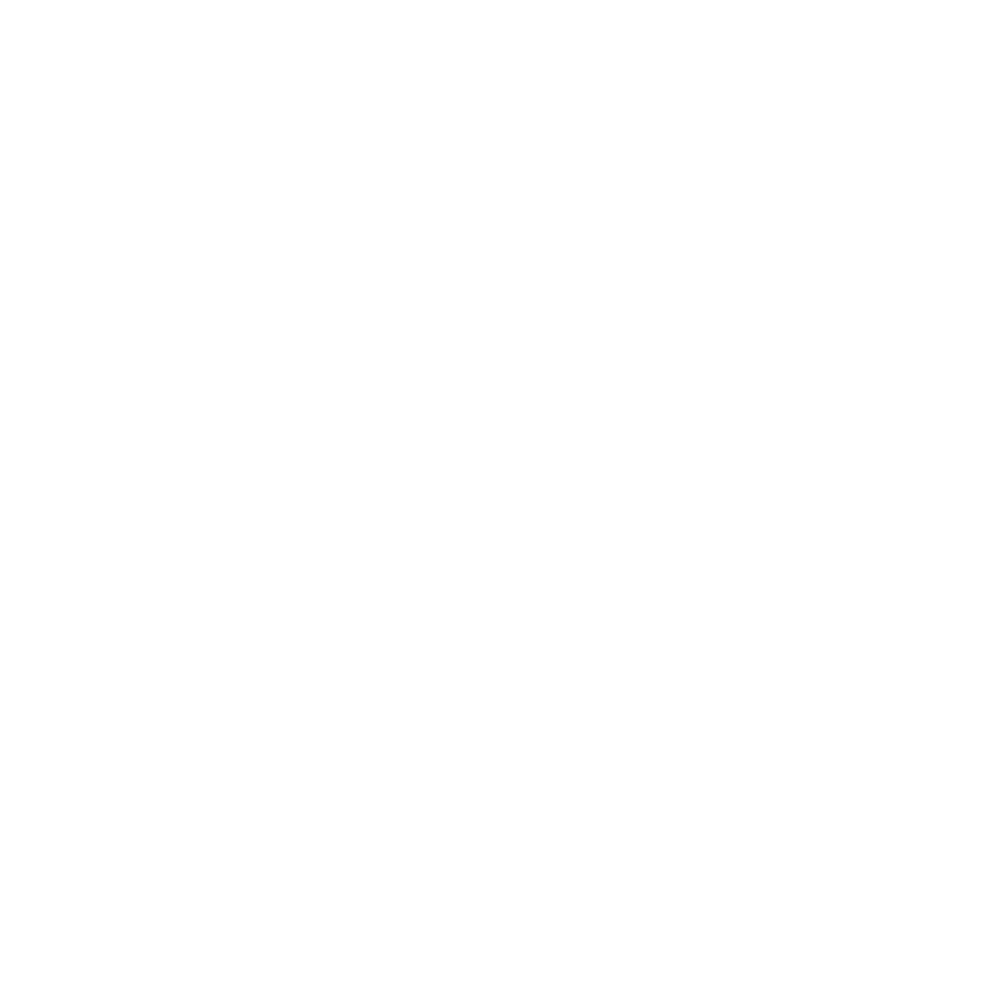

In [194]:
response.text

In [196]:
soup = BeautifulSoup(response.text)

In [198]:
soup.find_all("div", class_= "_csbfng _c8f6fq _g3gktf _ldyh40 _7l1ulh T_a6707275")[0].text

'₹1.27 Cr - 2.2 Cr'

In [200]:
for i in soup.find_all("div", class_="_csbfng _c8f6fq _g3gktf _ldyh40 _7l1ulh T_a6707275"):
    print(i.text)

₹1.27 Cr - 2.2 Cr
₹89.42 L - 1.46 Cr
₹1.39 Cr - 4.54 Cr
₹1.94 Cr - 2.18 Cr
₹3.5 Cr - 4.9 Cr
₹1.58 Cr - 1.89 Cr
₹1.09 Cr - 2.07 Cr
₹1.14 Cr - 1.51 Cr
₹1.08 Cr - 1.88 Cr
₹1.78 Cr
₹68.4 L - 94.05 L
₹55.93 L - 83.66 L
₹83.3 L - 1.38 Cr
₹10.72 L - 21.64 L
₹90.77 L - 1.75 Cr
₹13.72 L - 89.96 L
₹2.7 Cr - 7.5 Cr
₹83.09 L - 1.45 Cr
₹7.56 Cr - 16.54 Cr
₹23.84 L - 48.01 L
₹1.59 Cr - 2.75 Cr
₹1.25 Cr
₹1.8 Cr
₹2.5 Cr
₹1.6 Cr - 2.07 Cr
₹1.57 Cr - 1.8 Cr
₹1.78 Cr - 6.27 Cr
₹72.59 L - 1.42 Cr
₹76.1 L - 1.14 Cr
₹45.74 L - 62.48 L


In [221]:
Bhk = []
cost = []
name = []
area = []
for i in range(1,73):
    url = f"https://housing.com/in/buy/searches/BO0Psrbcrw7p4zhuczr?page={i}"
    response = requests.get(url)
    soup = BeautifulSoup(response.text)
    for i in soup.find_all("h3", class_="T_091c165f _sq1l2s _vv1q9c _ks15vq T_79c363f6 _5vy24jg8 _blas14la _csbfng _g3dlk8 _c81fwx _h3ftgi"):
        if re.findall(r"\d*.*\d*\s*,*BHK", i.text):
            Bhk.append("".join(re.findall(r"\d*.*\d*\s*,*BHK",i.text)))
        else:
            Bhk.append(np.nan)

    for i in soup.find_all("div", class_="_csbfng _c8f6fq _g3gktf _ldyh40 _7l1ulh T_a6707275"):
        if re.findall(r"₹\d*.\d*\sCr\s-\s\d*.\d*\sCr|₹\d*.\d*\sL\s-\s\d*.\d*\sL|₹\d*.\d*\sL\s-\s\d*.\d*\sCr|₹\d*.\d*\sCr", i.text):
            cost.append("".join(re.findall(r"₹\d*.\d*\sCr\s-\s\d*.\d*\sCr|₹\d*.\d*\sL\s-\s\d*.\d*\sL|₹\d*.\d*\sL\s-\s\d*.\d*\sCr|₹\d*.\d*\sCr",i.text)))
        else:
            cost.append(np.nan)
    for i in soup.find_all("h2", class_="T_4d93cd45 _7s5wglyw _1u71grho _gi182v"):    
        if re.findall(r"\w+", i.text):
            name.append("".join(re.findall(r"\w+",i.text)))
        else:
            name.append(np.nan)

In [223]:
max_len = max(len(name), len(cost), len(Bhk))

name += [None] * (max_len - len(name))
cost += [None] * (max_len - len(cost))
Bhk += [None] * (max_len - len(Bhk))

data = pd.DataFrame({"Name": name, "Cost": cost, "Bhk": Bhk})

In [225]:
data

,Name,Cost,Bhk
0,VasaviSkyla,₹1.99 Cr - 6.84 Cr,"3, 4, 5 BHK"
1,ShangrilaAbbham,₹3.5 Cr - 4.9 Cr,"3, 4 BHK"
2,AsblLandmark,₹1.27 Cr - 2.2 Cr,"3, 3.5, 4 BHK"
3,Amaranthine,₹1.78 Cr - 6.27 Cr,"3, 4, 5 BHK"
4,SubishiFortunaTowers,₹1.57 Cr - 1.8 Cr,"3, 4 BHK"
...,...,...,...
2149,None,₹1.82 Cr - 3.03 Cr,None
2150,None,₹1.16 Cr - 1.9 Cr,None
2151,None,₹70.0 L - 99.36 L,None
2152,None,₹82.46 L - 1.09 Cr,None


In [227]:
data.to_csv('/Users/apple/Downloads/project_housing.com/housing_com_sales.csv', index=False)

# Data Cleaning

In [230]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2154 entries, 0 to 2153
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Name    525 non-null    object
 1   Cost    1035 non-null   object
 2   Bhk     390 non-null    object
dtypes: object(3)
memory usage: 50.6+ KB


In [232]:
data["Cost"] = data["Cost"].apply(lambda x :str(x).replace(",",""))

In [234]:
data[data.duplicated()]

,Name,Cost,Bhk
30,ThemeImperial,₹1.38 Cr - 1.99 Cr,"3, 4 BHK"
31,SurakshaaGreenCity,₹45.74 L - 62.48 L,NaN
32,RiddhiLaxmanCounty,₹3.8 Cr - 4.07 Cr,4 BHK
33,SampadaCentralResidency,₹30.24 L - 72.54 L,NaN
34,AarnaPride,₹61.2 L - 79.56 L,"2, 3 BHK"
...,...,...,...
2133,None,nan,None
2134,None,nan,None
2135,None,nan,None
2144,None,nan,None


In [236]:
data1 = data.drop_duplicates()

In [238]:
data1

,Name,Cost,Bhk
0,VasaviSkyla,₹1.99 Cr - 6.84 Cr,"3, 4, 5 BHK"
1,ShangrilaAbbham,₹3.5 Cr - 4.9 Cr,"3, 4 BHK"
2,AsblLandmark,₹1.27 Cr - 2.2 Cr,"3, 3.5, 4 BHK"
3,Amaranthine,₹1.78 Cr - 6.27 Cr,"3, 4, 5 BHK"
4,SubishiFortunaTowers,₹1.57 Cr - 1.8 Cr,"3, 4 BHK"
...,...,...,...
2149,None,₹1.82 Cr - 3.03 Cr,None
2150,None,₹1.16 Cr - 1.9 Cr,None
2151,None,₹70.0 L - 99.36 L,None
2152,None,₹82.46 L - 1.09 Cr,None


In [240]:
data1.isnull().sum()

Name    234
Cost      0
Bhk     367
dtype: int64

In [242]:
# Categorical columns
cat_col = [col for col in data1.columns if data1[col].dtype == 'object']
print('Categorical columns :',cat_col)
# Numerical columns
num_col = [col for col in data1.columns if data1[col].dtype != 'object']
print('Numerical columns :',num_col)

Categorical columns : ['Name', 'Cost', 'Bhk']
Numerical columns : []


In [244]:
data1[cat_col].nunique()

Name    475
Cost    639
Bhk      27
dtype: int64

In [246]:
data1.to_csv('/Users/apple/Downloads/project_housing.com/housing_com_sales.csv', index=False)

In [248]:
data1

,Name,Cost,Bhk
0,VasaviSkyla,₹1.99 Cr - 6.84 Cr,"3, 4, 5 BHK"
1,ShangrilaAbbham,₹3.5 Cr - 4.9 Cr,"3, 4 BHK"
2,AsblLandmark,₹1.27 Cr - 2.2 Cr,"3, 3.5, 4 BHK"
3,Amaranthine,₹1.78 Cr - 6.27 Cr,"3, 4, 5 BHK"
4,SubishiFortunaTowers,₹1.57 Cr - 1.8 Cr,"3, 4 BHK"
...,...,...,...
2149,None,₹1.82 Cr - 3.03 Cr,None
2150,None,₹1.16 Cr - 1.9 Cr,None
2151,None,₹70.0 L - 99.36 L,None
2152,None,₹82.46 L - 1.09 Cr,None


In [250]:
data1.isna().sum()

Name    234
Cost      0
Bhk     367
dtype: int64

## Handling the miss data

In [253]:
data2 = data1.dropna()

In [255]:
data2

,Name,Cost,Bhk
0,VasaviSkyla,₹1.99 Cr - 6.84 Cr,"3, 4, 5 BHK"
1,ShangrilaAbbham,₹3.5 Cr - 4.9 Cr,"3, 4 BHK"
2,AsblLandmark,₹1.27 Cr - 2.2 Cr,"3, 3.5, 4 BHK"
3,Amaranthine,₹1.78 Cr - 6.27 Cr,"3, 4, 5 BHK"
4,SubishiFortunaTowers,₹1.57 Cr - 1.8 Cr,"3, 4 BHK"
...,...,...,...
520,PrestigeNeopolis,₹40.0 L - 1.0 Cr,"3, 4 BHK"
521,FrontlineSeven,₹5.21 Cr - 5.4 Cr,"2, 3 BHK"
522,JaiSriDeviHomesSamruddhi,₹46.42 L - 84.98 L,"2, 3 BHK"
523,ShreeApartments,₹4.0 Cr - 17.35 Cr,"2, 3 BHK"


In [257]:
data2.to_csv('/Users/apple/Downloads/project_housing.com/housing_com_sales.csv', index=False)

In [259]:
data2.count()

Name    383
Cost    383
Bhk     383
dtype: int64

<Axes: xlabel='Cost'>

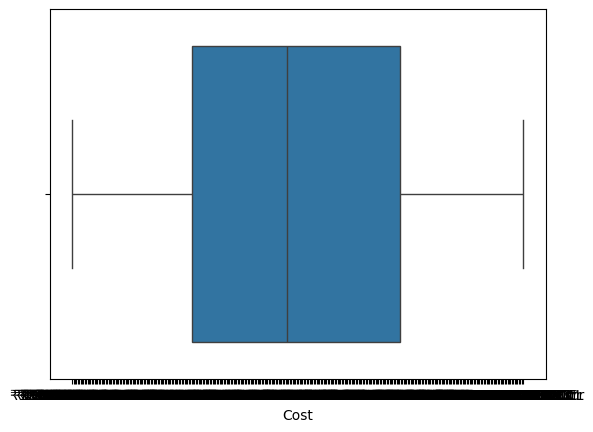

In [261]:
sns.boxplot(x = data2['Cost'])

# Data Analysis

In [264]:
data2.describe()

,Name,Cost,Bhk
count,383,383,383
unique,358,322,27
top,ManbhumHomeTree,nan,"2, 3 BHK"
freq,3,37,138


In [266]:
data2['Cost'] = pd.to_numeric(data2['Cost'], errors='coerce')

/var/folders/r3/q2qhmvk95jq2dy6s00n_stg40000gn/T/ipykernel_27320/552351060.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data2['Cost'] = pd.to_numeric(data2['Cost'], errors='coerce')


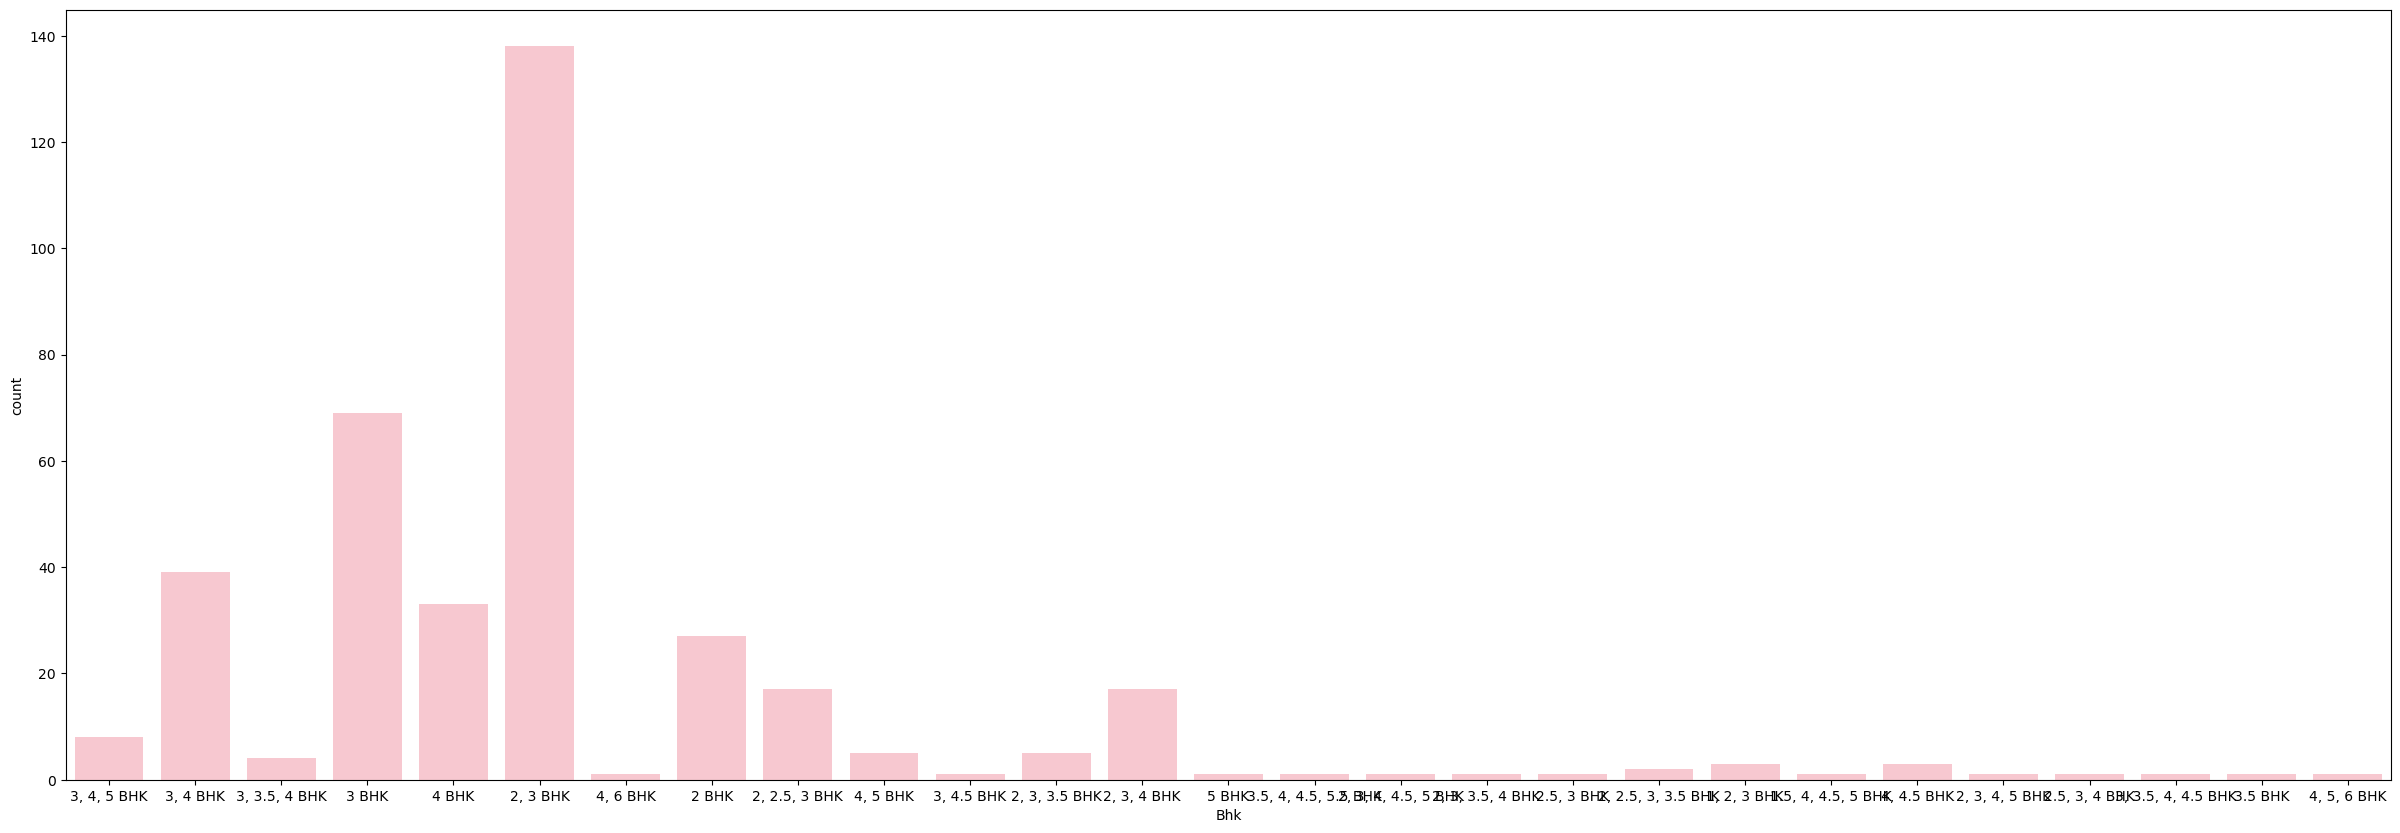

In [280]:
plt.figure(figsize=(30,10))
sns.countplot(x='Bhk',data = data2, color = 'pink')
plt.show()